In [13]:
deepfake_test_b0(r'G:\Coding\internship\Deepfore\dataset\complete_train_dataset\bgwmmujlmc.mp4')

(72, 224, 224, 3)


'98.61% confident that this video is real'

In [14]:
deepfake_test_b0(r'G:\Coding\internship\Deepfore\dataset\complete_train_dataset\aagfhgtpmv.mp4')

(75, 224, 224, 3)


'97.33% confident that this video is fake'

In [1]:
def deepfake_test_b0(src):
    import cv2
    import pandas as pd
    import numpy as np
    import os
    from matplotlib.pyplot import imread
    from matplotlib.pyplot import imshow
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.applications.imagenet_utils import decode_predictions
    from tensorflow.keras.applications.imagenet_utils import preprocess_input
    import tensorflow as tf
    from tensorflow.keras import layers
    from tensorflow.keras.applications import EfficientNetB0
    
    NUM_CLASSES = 2
    IMG_SIZE = 224
    size = (IMG_SIZE, IMG_SIZE)
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #tf.compat.v1.disable_eager_execution()
    # Using model without transfer learning
    outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )
    model.load_weights('G:/Coding/internship/Deepfore/training_weights/efficientNet-b0/training_weight2/cp.ckpt').expect_partial()
    
    if src.split('.')[-1] == 'jpg' or src.split('.')[-1] == 'jpeg' or src.split('.')[-1] == 'png' or src.split('.')[-1] == 'webp':
        img_path = src

        #img = image.load_img(img_path, target_size=(224, 224))
        #x = img.img_to_array(img)

        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))

        x5 = np.expand_dims(img, axis=0)
        x5 = preprocess_input(x5)

        print('Input image shape:', x5.shape)

        my_image = imread(img_path)
        imshow(my_image)
        
        preds=model.predict(x5)
        labels = np.argmax(preds, axis=-1)
        
        #Converting the output into readable classes (Real or Fake)
        class_preds = {'REAL': [], 'FAKE': []}
        class_conf = []
        for i, j in zip(labels, preds):
            if i == 1:
                class_preds['REAL'].append(j[1])
            else:
                class_preds['FAKE'].append(j[0])
        
        #Determing the confidence level of each class
        real_conf = 0
        fake_conf = 0
        if len(class_preds['REAL']) > 0:
            real_conf += round(int(class_preds['REAL'][0]*100),2)
        elif len(class_preds['FAKE']) > 0:
            fake_conf += round(int(class_preds['FAKE'][0]*100),2)
        
        #Printing the result
        for i in labels:
            if i == 1:
                return f'{real_conf}% confident that this is a real image'
            else:
                return f'{fake_conf}% confident that this is a fake image'
            
    #Begin testing for video files            
    elif src.split('.')[-1] == 'mp4':
        #Split the video into frames
        t_images = []
        face_cascade = cv2.CascadeClassifier('G:/Coding/internship/Deepfore/modules/haarcascade_frontalface_alt2.xml')
        gap = 4 #setting a gap variable to skip frames and print every 4th frame
        name = src.split('/')[-1].split('.')[0]
        if src.endswith('mp4'):
            capture = cv2.VideoCapture(src)
            frameNr = 0 #setting the frame counter
            while (True):
                success, frame = capture.read()
                if success == False:
                    capture.release()
                    break

                elif frameNr == 0 or frameNr % gap == 0:
                    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
                    try:
                        for (x,y,w,h) in faces:
                            roi_color = frame[y:y+h, x:x+w]  #y-10:y + h+10, x-10:x + w +10
                        resized = cv2.resize(roi_color, (224,224))
                        t_images.append(resized)
                    except:
                        pass
                    
                frameNr = frameNr+1
        
        
        #Converting the images into [0,255] range
        t_images = np.array(t_images)
        t_images = t_images.astype('float32') / 255.0
        print(t_images.shape)
        #Predicting the output
        preds=model.predict(t_images)
        labels = np.argmax(preds, axis=-1)
        
        #Converting the output into readable classes (Real or Fake)
        
        class_preds = {'REAL': [], 'FAKE': []}
        class_conf = []
        for i, j in zip(labels, preds):
            if i == 1:
                class_preds['REAL'].append(j[1])
            else:
                class_preds['FAKE'].append(j[0])
        
        #Checking for confidence level for each class determined
        real_conf = 0
        fake_conf = 0
        if len(class_preds['REAL']) > 0:
            real_conf += round(len(class_preds['REAL'])/(len(class_preds['REAL'])+len(class_preds['FAKE']))*100,2)  
        if len(class_preds['FAKE']) > 0:
            fake_conf += round(len(class_preds['FAKE'])/(len(class_preds['REAL'])+len(class_preds['FAKE']))*100,2)
        
        #Printing the result
        if len(class_preds['REAL']) > len(class_preds['FAKE']):
            return f'{real_conf}% confident that this video is real'
        elif len(class_preds['REAL']) < len(class_preds['FAKE']):
            return f'{fake_conf}% confident that this video is fake'
        elif len(class_preds['REAL']) == len(class_preds['FAKE']):
            return 'COULD NOT DETECT'
                

Input image shape: (1, 224, 224, 3)


'100% confident that this is a real image'

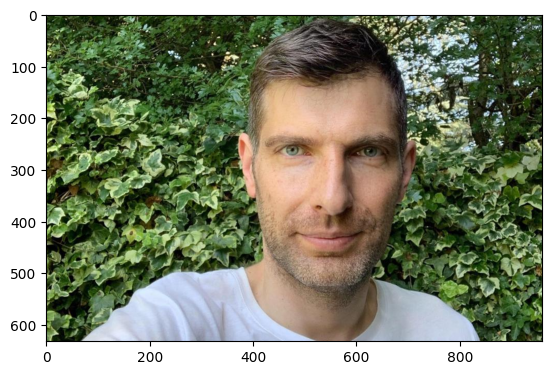

In [2]:
deepfake_test_b0(r'G:\Coding\internship\Deepfore\dataset\sample images for testing\1.jpg')